In [42]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
font = {'size': 30}
mpl.rc('font', **font)

In [7]:
df2 = pd.read_csv("./bases/wdi/Indicators.csv")


In [32]:
dfmasc = pd.read_csv("./bases/suicide/suicidioMasculinoGlobal.csv")
dffem = pd.read_csv("./bases/suicide/suicidioFemininoGlobal.csv")

In [8]:
filtro = df2.IndicatorCode.isin(['SP.DYN.LE00.IN','SP.DYN.LE00.FE.IN','SP.DYN.LE00.MA.IN'])
filtro2 = df2.Year > 1999 
filtro3 = df2.Year < 2016
df2 = df2[filtro & filtro3]
df2.replace(["Slovak Republic", "Kyrgyz Republic","St. Lucia","Bahamas, The","Korea, Dem. Rep.","St. Vincent and the Grenadines","Russia"], ['Slovakia', 'Kyrgyzstan', 'Saint Lucia', 'Bahamas', 'Republic of Korea', 'Saint Vincent and Grenadines','Russian Federation'], inplace=True)                                 
filtro4 = df2.CountryName.isin(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Panama', 'Paraguay', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Lucia', 'Saint Vincent and Grenadines', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'Spain', 'Suriname', 'Sweden', 'Switzerland', 'Thailand', 'Trinidad and Tobago', 'Turkmenistan', 'Ukraine', 'United Kingdom', 'United States', 'Uruguay'])
df2 = df2[filtro2].reset_index(drop=True)
df2.rename(columns={'CountryName':'country','CountryCode':'countrycode'}, inplace=True)
df2

/home/nicoedu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


,country,countrycode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2000,69.652107
1,Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,2000,66.101700
2,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,67.826949
3,Caribbean small states,CSS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2000,72.578948
4,Caribbean small states,CSS,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,2000,66.441994
5,Caribbean small states,CSS,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,69.438262
6,Central Europe and the Baltics,CEB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2000,76.787086
7,Central Europe and the Baltics,CEB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,2000,68.857086
8,Central Europe and the Baltics,CEB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2000,72.719690
9,East Asia & Pacific (all income levels),EAS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2000,73.659082


Text(0, 0.5, 'Expectativa de vida')

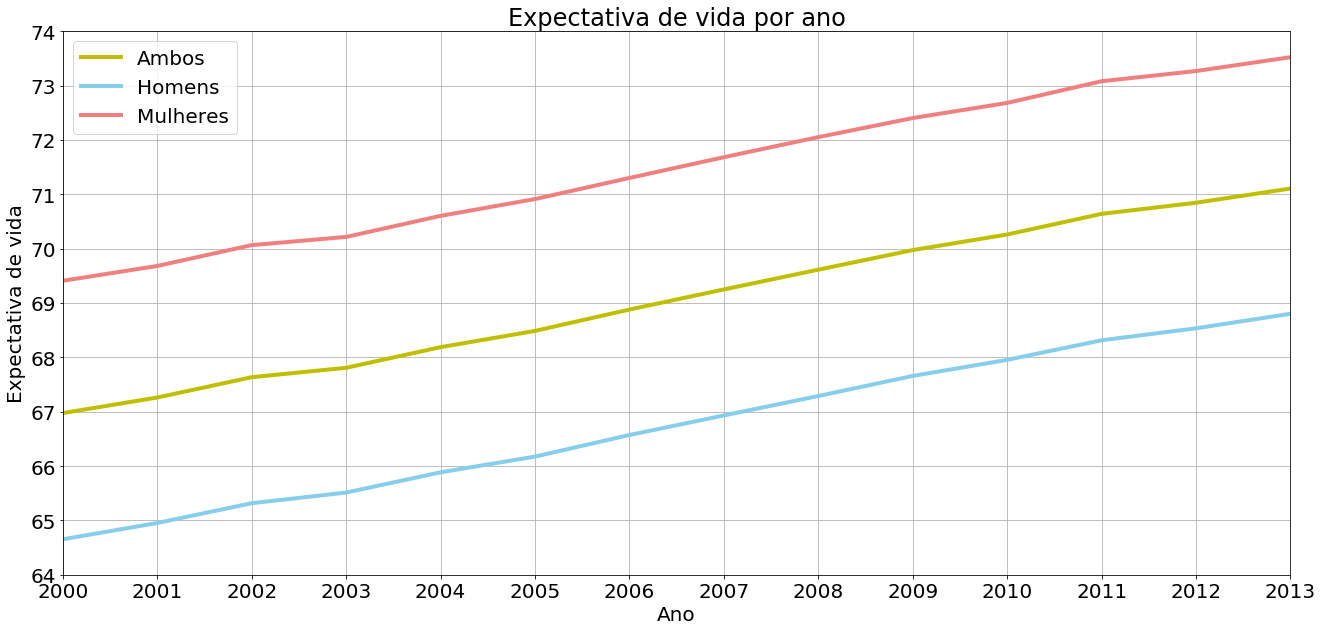

In [9]:
dfex = df2.groupby(['Year','IndicatorCode']).agg(np.mean).reset_index()
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title("Expectativa de vida por ano")
dfex.where(dfex['IndicatorCode'] == 'SP.DYN.LE00.IN').dropna().plot( 'Year', 'Value',grid=True, ax=ax,xticks=range(2000,2014), color='y', linewidth=4, label='Ambos')
dfex.where(dfex['IndicatorCode'] == 'SP.DYN.LE00.MA.IN').dropna().plot( 'Year', 'Value',grid=True, ax=ax, linestyle='-', color='skyblue', linewidth=4, label='Homens')
dfex.where(dfex['IndicatorCode'] == 'SP.DYN.LE00.FE.IN').dropna().plot( 'Year', 'Value',grid=True, ax=ax, yticks=range(64,75),linestyle='-', color='lightcoral', linewidth=4, label='Mulheres')
ax.set_xlabel("Ano")
ax.set_ylabel("Expectativa de vida")

In [38]:
dfx = dfex[df2['IndicatorCode'] == 'SP.DYN.LE00.MA.IN']
dfx = dfx.rename(columns={'Year':'year'})
dfm = dfmasc[dfmasc.year < 2014].join(dfx.set_index(['year']), on=['year'])
list(map(lambda x:dfm[x].corr(dfm.Value),dfm.columns[1:7]))

/home/nicoedu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[-0.790964307545365,
 -0.9455602757211395,
 -0.9696764786473733,
 -0.9719448609240073,
 -0.9775842836025636,
 -0.9858977213574568]

In [39]:
dfx = dfex[df2['IndicatorCode'] == 'SP.DYN.LE00.FE.IN']
dfx = dfx.rename(columns={'Year':'year'})
dff = dffem[dffem.year < 2014].join(dfx.set_index(['year']), on=['year'])
list(map(lambda x:dff[x].corr(dff.Value),dff.columns[1:7]))

/home/nicoedu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


[0.7647035788038193,
 0.329929206254727,
 -0.0877176261192214,
 -0.8925027209028754,
 -0.9811250933353189,
 -0.989524873805775]

Text(0, 0.5, 'Idade')

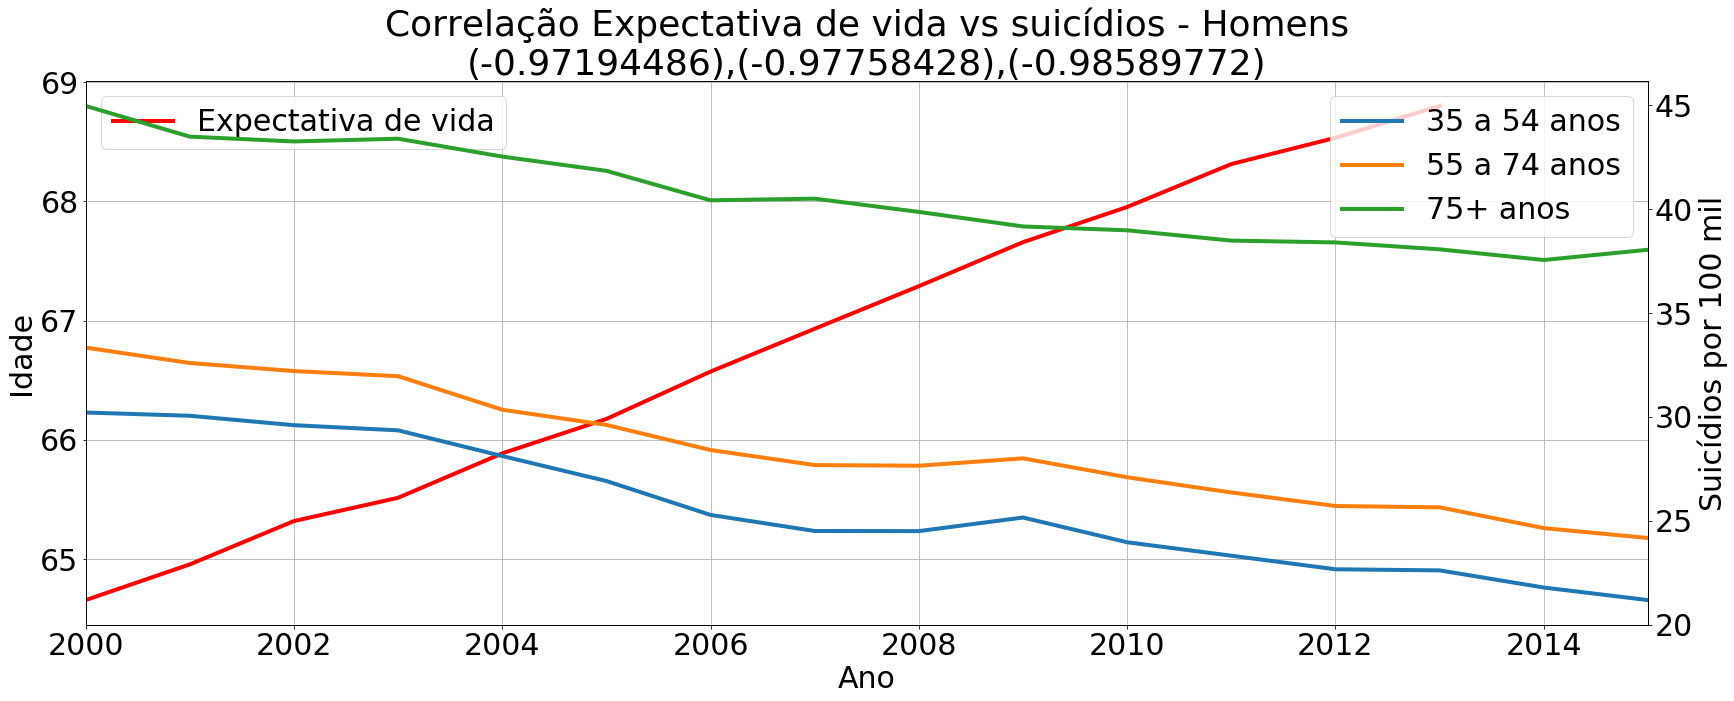

In [49]:
fig, ax = plt.subplots(figsize=(28, 10))
ax.set_title("Correlação Expectativa de vida vs suicídios - Homens\n(-0.97194486),(-0.97758428),(-0.98589772)")

dfex.where(dfex['IndicatorCode'] == 'SP.DYN.LE00.MA.IN').dropna().plot( 'Year', 'Value',grid=True, ax=ax, linestyle='-', color='red', linewidth=4, label='Expectativa de vida')
ax2 = ax.twinx()
ax2.set_ylabel("Suicídios por 100 mil")
dfmasc.plot(x='year', y='suicidio3554',linewidth=4, ax=ax2, label='35 a 54 anos')
dfmasc.plot(x='year', y='suicidio5574',linewidth=4, ax=ax2,label='55 a 74 anos')
dfmasc.plot(x='year', y='suicidio75',linewidth=4, ax=ax2, label='75+ anos')
ax.set_xlabel("Ano")
ax.set_ylabel("Idade")

Text(0, 0.5, 'Idade')

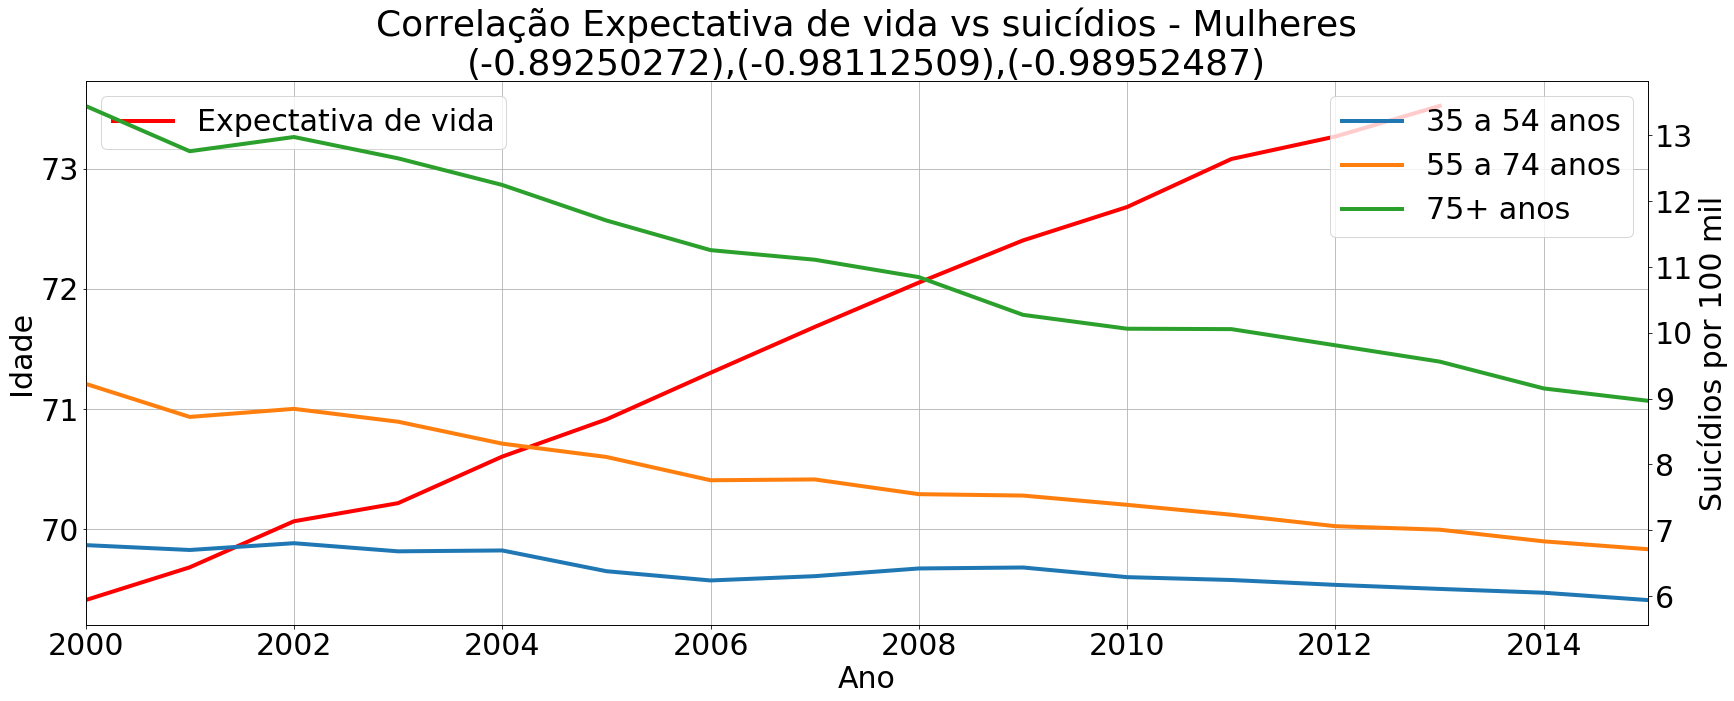

In [48]:
fig, ax = plt.subplots(figsize=(28, 10))
ax.set_title("Correlação Expectativa de vida vs suicídios - Mulheres\n(-0.89250272),(-0.98112509),(-0.98952487)")

dfex.where(dfex['IndicatorCode'] == 'SP.DYN.LE00.FE.IN').dropna().plot( 'Year', 'Value',grid=True, ax=ax, linestyle='-', color='red', linewidth=4, label='Expectativa de vida')
ax2 = ax.twinx()
ax2.set_ylabel("Suicídios por 100 mil")
dffem.plot(x='year', y='suicidio3554',linewidth=4, ax=ax2, label='35 a 54 anos')
dffem.plot(x='year', y='suicidio5574',linewidth=4, ax=ax2,label='55 a 74 anos')
dffem.plot(x='year', y='suicidio75',linewidth=4, ax=ax2, label='75+ anos')
ax.set_xlabel("Ano")
ax.set_ylabel("Idade")